In [6]:
import requests
import matplotlib.pyplot as plt
from time import time

#host = 'https://8d067d1e-81c7-435e-982f-3e5702dfd081.deepnoteproject.com'
host = 'http://0.0.0.0:8080'

In [13]:
from_ = 0
to_ = int(time()*1000)

decoded_labels = {
    1:'car',
    2:'bus',
    4:'motorcycle',
    }

In [14]:
from_, to_

(0, 1681399447688)

In [15]:
# Get all the mac addresses
response = requests.get(host + '/devices')
if response.status_code == 200:
    devices = response.json()['mac_addresses']
    print(f'The mac addresses are {devices}.')
else:
    print(response.text)
    exit()

The mac addresses are ['0xdca9047270e2', '0x19f57bb40d93'].


200
{'mac_address': '0xdca9047270e2', 'timestamps': [1681333480366, 1681333481383, 1681333482404, 1681333485377, 1681333486399, 1681333488349, 1681333491413, 1681333494385, 1681333495407, 1681333498380, 1681333500423, 1681333501352, 1681333502374, 1681333507388, 1681333509339, 1681333510360, 1681334954275, 1681334956317, 1681334958269, 1681334961240, 1681334963284, 1681334965235, 1681334967278, 1681334970250, 1681334971271, 1681334972293, 1681334973314, 1681334974243, 1681334975266, 1681334977309, 1681334981301, 1681334983252, 1681334984275, 1681334985296, 1681334987245, 1681334989290, 1681334990310, 1681334991240, 1681334993284, 1681334994304], 'labels': [1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0]}


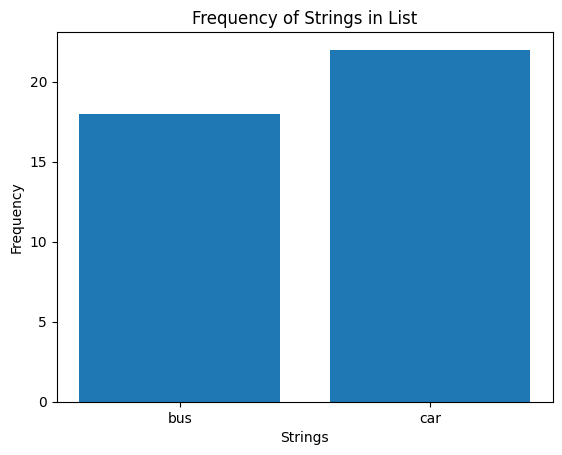

200
{'mac_address': '0x19f57bb40d93', 'timestamps': [1681391610256, 1681391615254, 1681391616252, 1681391618253, 1681391619254, 1681391624249, 1681391629254, 1681391630249, 1681391638246, 1681391640248, 1681391643248, 1681391647254, 1681391649240, 1681391650246, 1681391652240, 1681391653249, 1681391654250, 1681391655248, 1681391656259, 1681391659256, 1681391660263, 1681391661277, 1681391663272, 1681391664270, 1681391665270, 1681391666269, 1681391670262, 1681391673260, 1681391678254, 1681391680254, 1681391683252, 1681391684246, 1681391685246, 1681391686245, 1681391687248, 1681391689243, 1681391690238, 1681391692244, 1681391693236, 1681391695239, 1681391696234, 1681391698236, 1681391700231, 1681391702225, 1681391706242, 1681391712246, 1681391713234, 1681391716229, 1681391717228, 1681391719226, 1681391720235, 1681391723236, 1681391726229, 1681391727235, 1681391729227, 1681391733228, 1681391736222, 1681391738223, 1681391739217, 1681391740223, 1681391741216, 1681391742218, 1681391743218, 16

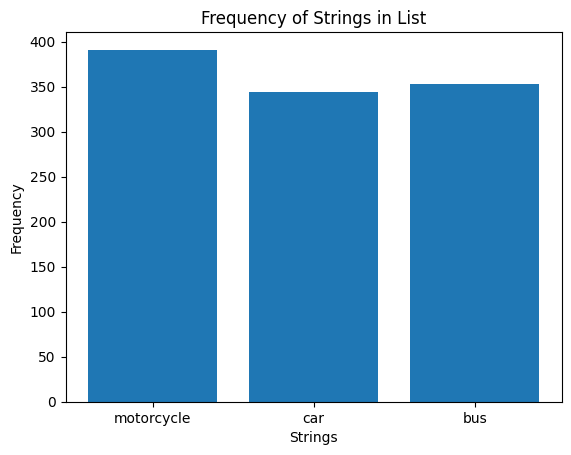

In [18]:
for device in devices:
    response = requests.get(f"{host}/device/{device}?from={from_}&to={to_}")
    print(response.status_code)
    if response.status_code == 200:
        print(response.json())
        timestamps = response.json()['timestamps']
        zone_labels = response.json()['labels']
        dl = [decoded_labels[int(z)] for z in zone_labels]
        freq_dict = {}
        for l in dl:
            if l in freq_dict:
                freq_dict[l] += 1
            else:
                freq_dict[l] = 1

        # Get all unique items in the list as x-axis labels
        x_labels = list(set(dl))

        # Create list of frequency counts for all labels (including zero counts)
        y_values = []
        for label in x_labels:
            if label in freq_dict:
                y_values.append(freq_dict[label])
            else:
                y_values.append(0)



        # Create bar plot
        plt.bar(x_labels, y_values)

        # Set axis labels and title
        plt.xlabel('Strings')
        plt.ylabel('Frequency')
        plt.title('Frequency of Strings in List')

        # Show plot
        plt.show()
    else:
        print(response.text)
        exit()


In [6]:
# Get all the mac addresses
response = requests.get(host + '/zones')
if response.status_code == 200:
    zones = response.json()['zones']
    print(f'The zone names are {zones}.')
else:
    print(response.text)
    exit()

The zone names are ['acevedo', 'magallanes'].


200
{'zone': 'acevedo', 'timestamps': [[1681334953063, 1681334955057, 1681334956057, 1681334957063, 1681334958055, 1681334960056, 1681334961056, 1681334963055, 1681334964053, 1681334965053, 1681334966060, 1681334968052, 1681334973053, 1681334974049, 1681334975234, 1681334976051, 1681334978047, 1681334979052, 1681334982049, 1681334985049, 1681334986047, 1681334987044, 1681334991043, 1681334992042, 1681334993043, 1681334994041, 1681334996044, 1681334997042, 1681335001048, 1681335002049, 1681335004047, 1681335005049, 1681335006050, 1681335008045, 1681335009044, 1681335010045, 1681335014045, 1681335015047, 1681335017052, 1681335018052, 1681335019053, 1681335021050, 1681335022051, 1681335024051, 1681335026047, 1681335027056, 1681335028052, 1681335029046, 1681335031056, 1681335032046, 1681335034045, 1681335035045, 1681335036044, 1681335039043, 1681335040042, 1681335041041, 1681335042045, 1681335048039, 1681335051039, 1681335052040, 1681335053041, 1681335055037, 1681335058035, 1681335059035, 

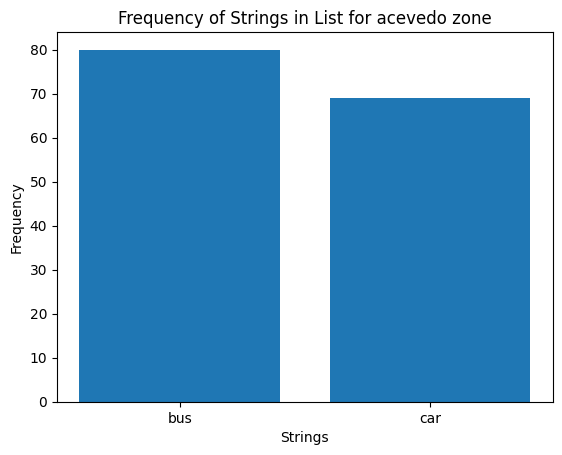

200
{'zone': 'magallanes', 'timestamps': [[1681333480366, 1681333481383, 1681333482404, 1681333485377, 1681333486399, 1681333488349, 1681333491413, 1681333494385, 1681333495407, 1681333498380, 1681333500423, 1681333501352, 1681333502374, 1681333507388, 1681333509339, 1681333510360, 1681334954275, 1681334956317, 1681334958269, 1681334961240, 1681334963284, 1681334965235, 1681334967278, 1681334970250, 1681334971271, 1681334972293, 1681334973314, 1681334974243, 1681334975266, 1681334977309, 1681334981301, 1681334983252, 1681334984275, 1681334985296, 1681334987245, 1681334989290, 1681334990310, 1681334991240, 1681334993284, 1681334994304]], 'labels': [[1.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 2.0, 2.0, 1.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 2.0, 2.0, 1.0, 2.0, 1.0, 1.0, 2.0, 1.0]]}
40
40
['car', 'car', 'bus', 'car', 'bus', 'bus', 'car', 'car', 'bus', 'car', 'car', 'car', 'car', 'bus', 'car', 'car', 'bus', 'car', 'car', '

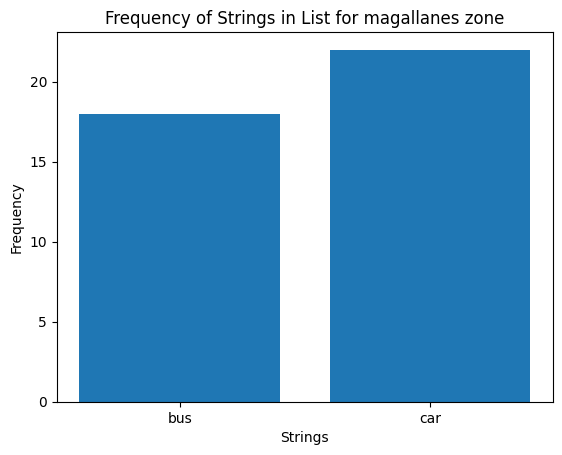

In [10]:
for zone in zones:
    response = requests.get(f"{host}/zone/{zone}?from={from_}&to={to_}")
    print(response.status_code)
    if response.status_code == 200:
        print(response.json())
        timestamps = response.json()['timestamps']
        print(len(timestamps[0]))
        zone_labels = response.json()['labels']
        number_labels = [label for mac in zone_labels for label in mac]
        print(len(number_labels))
        dl = [decoded_labels[int(z)] for z in number_labels]
        print(dl)
        # Calculate frequencies of each string in the list
        freq_dict = {}
        for l in dl:
            if l in freq_dict:
                freq_dict[l] += 1
            else:
                freq_dict[l] = 1

        # Get all unique items in the list as x-axis labels
        x_labels = list(set(dl))

        # Create list of frequency counts for all labels (including zero counts)
        y_values = []
        for label in x_labels:
            if label in freq_dict:
                y_values.append(freq_dict[label])
            else:
                y_values.append(0)



        # Create bar plot
        plt.bar(x_labels, y_values)

        # Set axis labels and title
        plt.xlabel('Strings')
        plt.ylabel('Frequency')
        plt.title(f'Frequency of Strings in List for {zone} zone')

        # Show plot
        plt.show()
    else:
        print(response.text)
        exit()


In [ ]:
zone_to_delete = zones[-1]
print(zone_to_delete)
# Delete todo item
response = requests.delete(host + f'/zone/{zone_to_delete}')
if response.status_code == 200:
    print()
    print('Item deleted.')
else:
    print(response.text)
    exit()

magallanes

Item deleted.


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=251b70cc-64ed-4269-9639-75a0d233eb14' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>